#Download Dataset into Drive

In [1]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import kagglehub
import shutil



# Define the paths for the new directories
datasets_folder_path = '/content/drive/My Drive/Datasets'
brain_tumor_folder_path = os.path.join(datasets_folder_path, 'brain tumor dataset')

# Create the directories
os.makedirs(brain_tumor_folder_path, exist_ok=True)

# Download the dataset to a temporary location
temp_path = kagglehub.dataset_download("rishantenis/brain-tumor-mri-dataset")

# Move the downloaded files to the 'brain tumor dataset' folder
for filename in os.listdir(temp_path):
    shutil.move(os.path.join(temp_path, filename), os.path.join(brain_tumor_folder_path, filename))

print("Dataset files downloaded to:", brain_tumor_folder_path)


100%|██████████| 149M/149M [00:01<00:00, 119MB/s]

Extracting files...


Dataset files downloaded to: /content/drive/My Drive/Datasets/brain tumor dataset


In [2]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.7 MB/s eta 0:00:00
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=9df35c2b8ca5633391d60a6a95c11fb10686ed201288a2214daa69632c8d45be
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [3]:
! pip install split-folders

In [4]:
! pip install torchsummary
! pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.8 MB/s eta 0:00:00


#Import Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import copy
import os
import torch
from PIL import Image
from torch.utils.data import Dataset, Dataset, DataLoader, random_split ,Subset
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
from torchvision.datasets import ImageFolder
from torchsummary import summary
import splitfolders
import torch.nn.functional as F
import pathlib
from torch import optim
import torchvision.models as models
from torchviz import make_dot
from torchvision import models
from torchviz import make_dot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random

#import zipfile

#Import Dataset and BCreate DataFrame

In [6]:
import os
import pandas as pd

# Define the path to the directories
train_dir = '/content/drive/MyDrive/Datasets/brain tumor dataset/Training'
test_dir = '/content/drive/MyDrive/Datasets/brain tumor dataset/Testing'

# Function to create a DataFrame with image paths and labels
def create_dataframe(directory):
    data = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):  # Check if it's a directory
            for file in os.listdir(label_dir):
                if file.endswith(('.png', '.jpg', '.jpeg')):  # Include image file types
                    data.append({'file_path': os.path.join(label_dir, file), 'label': label})
    return pd.DataFrame(data)

# Create DataFrames for train and test datasets
train_df = create_dataframe(train_dir)
test_df = create_dataframe(test_dir)

# Print out the first few rows of the DataFrames
print("Train DataFrame:")
print(train_df.head())
print("\nTest DataFrame:")
print(test_df.head())


Train DataFrame:
                                           file_path   label
0  /content/drive/MyDrive/Datasets/brain tumor da...  glioma
1  /content/drive/MyDrive/Datasets/brain tumor da...  glioma
2  /content/drive/MyDrive/Datasets/brain tumor da...  glioma
3  /content/drive/MyDrive/Datasets/brain tumor da...  glioma
4  /content/drive/MyDrive/Datasets/brain tumor da...  glioma

Test DataFrame:
                                           file_path    label
0  /content/drive/MyDrive/Datasets/brain tumor da...  notumor
1  /content/drive/MyDrive/Datasets/brain tumor da...  notumor
2  /content/drive/MyDrive/Datasets/brain tumor da...  notumor
3  /content/drive/MyDrive/Datasets/brain tumor da...  notumor
4  /content/drive/MyDrive/Datasets/brain tumor da...  notumor


In [7]:
train_df.shape

(5712, 2)

In [8]:
test_df.shape

(1311, 2)

In [9]:
train_df.head()

file_path   label
0  /content/drive/MyDrive/Datasets/brain tumor da...  glioma
1  /content/drive/MyDrive/Datasets/brain tumor da...  glioma
2  /content/drive/MyDrive/Datasets/brain tumor da...  glioma
3  /content/drive/MyDrive/Datasets/brain tumor da...  glioma
4  /content/drive/MyDrive/Datasets/brain tumor da...  glioma

In [10]:
test_df.head()

file_path    label
0  /content/drive/MyDrive/Datasets/brain tumor da...  notumor
1  /content/drive/MyDrive/Datasets/brain tumor da...  notumor
2  /content/drive/MyDrive/Datasets/brain tumor da...  notumor
3  /content/drive/MyDrive/Datasets/brain tumor da...  notumor
4  /content/drive/MyDrive/Datasets/brain tumor da...  notumor

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5712 entries, 0 to 5711
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  5712 non-null   object
 1   label      5712 non-null   object
dtypes: object(2)
memory usage: 89.4+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  1311 non-null   object
 1   label      1311 non-null   object
dtypes: object(2)
memory usage: 20.6+ KB


In [13]:
train_df.describe()

file_path    label
count                                                5712     5712
unique                                               5712        4
top     /content/drive/MyDrive/Datasets/brain tumor da...  notumor
freq                                                    1     1595

In [14]:
test_df.describe()

file_path    label
count                                                1311     1311
unique                                               1311        4
top     /content/drive/MyDrive/Datasets/brain tumor da...  notumor
freq                                                    1      405

In [15]:
train_label_counts = train_df['label'].value_counts()
test_label_counts = test_df['label'].value_counts()

In [16]:
train_df.isnull().sum()

file_path    0
label        0
dtype: int64

In [17]:
test_df.isnull().sum()

file_path    0
label        0
dtype: int64

In [18]:
train_df_copy = copy.deepcopy(train_df)
test_df_copy = copy.deepcopy(test_df)

In [19]:
train_df.duplicated().sum()

0

In [20]:
test_df.duplicated().sum()

0

In [21]:
train_df['label'].unique()

array(['glioma', 'meningioma', 'notumor', 'pituitary'], dtype=object)

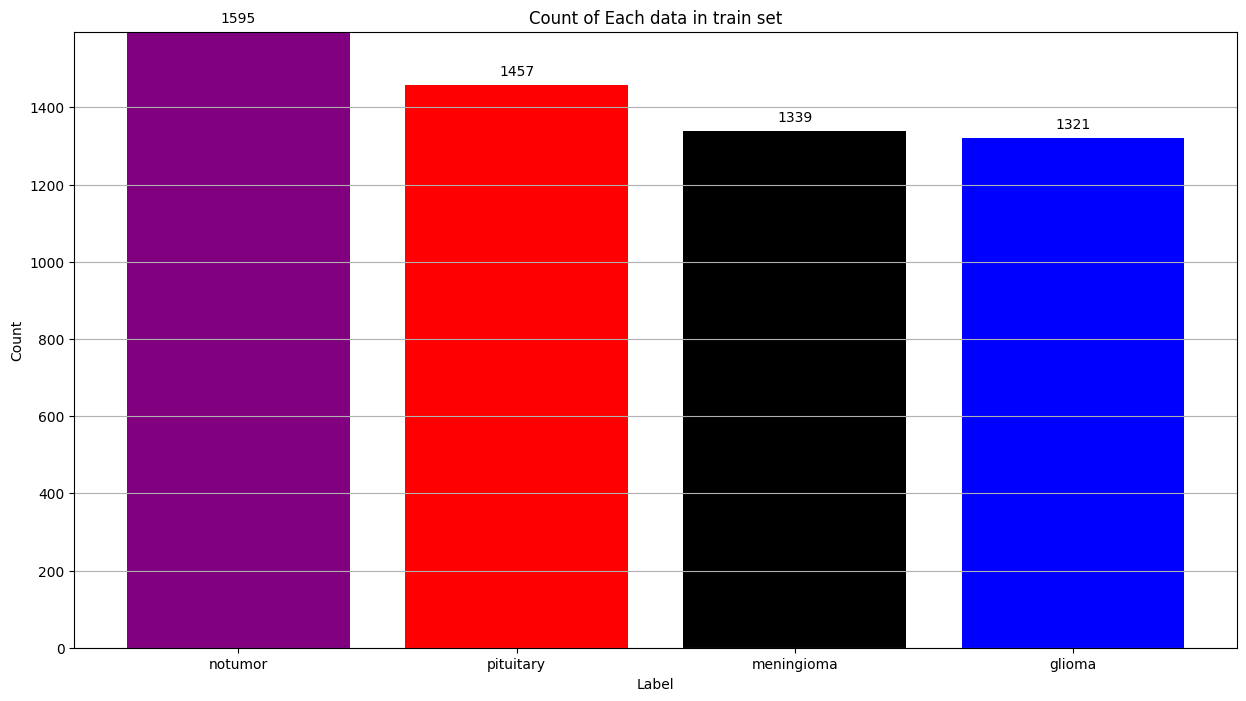

In [22]:
# Define a color for each label
colors = {
    'pituitary': 'red',
    'meningioma': 'black',
    'glioma' : 'blue',
    'notumor' : 'purple'
}

# Create the plot
plt.figure(figsize=(15, 8))
bars = plt.bar(train_label_counts.index, train_label_counts.values, color=[colors[label] for label in train_label_counts.index])

# Set y-axis limit
plt.ylim(0, train_label_counts.max() + 1)

# Annotate bars with their heights
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # Offset text slightly above the bar
                 textcoords='offset points',
                 ha='center',
                 va='bottom')

# Show the plot
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each data in train set')
plt.grid(axis='y')
plt.show()


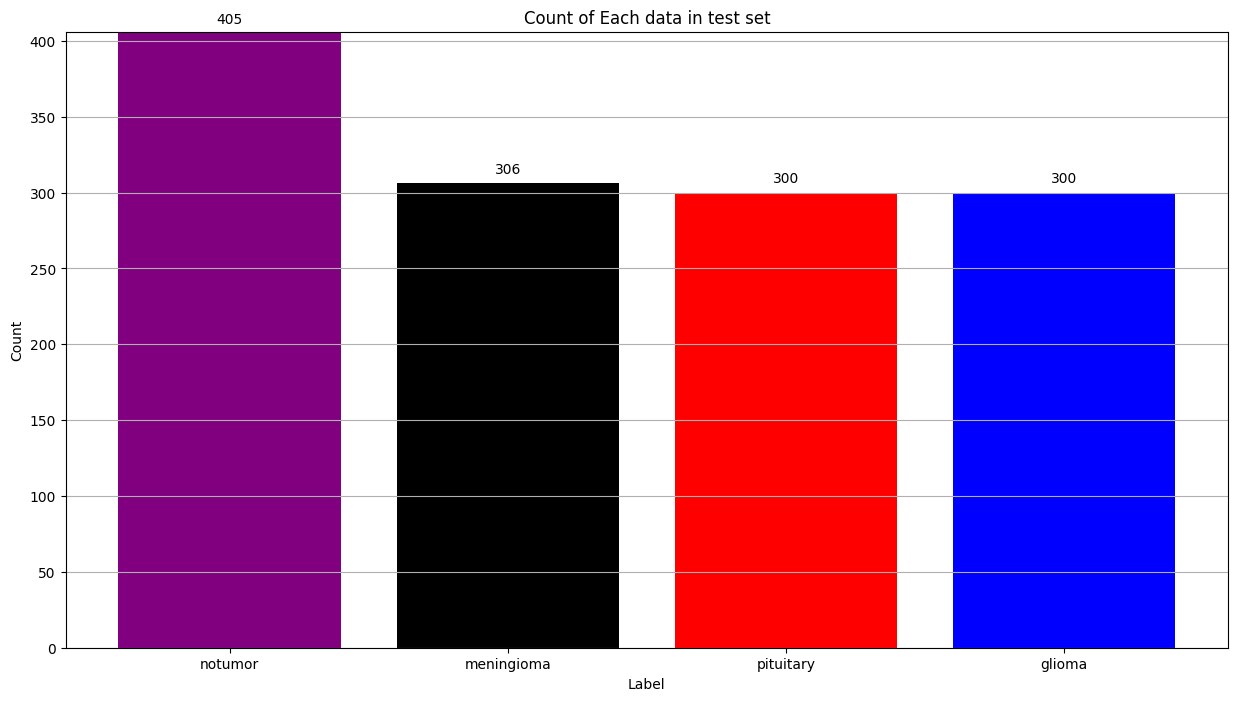

In [23]:
# Define a color for each label
colors = {
    'pituitary': 'red',
    'meningioma': 'black',
    'glioma' : 'blue',
    'notumor' : 'purple'
}

# Create the plot
plt.figure(figsize=(15, 8))
bars = plt.bar(test_label_counts.index, test_label_counts.values, color=[colors[label] for label in test_label_counts.index])

# Set y-axis limit
plt.ylim(0, test_label_counts.max() + 1)

# Annotate bars with their heights
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # Offset text slightly above the bar
                 textcoords='offset points',
                 ha='center',
                 va='bottom')

# Show the plot
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each data in test set')
plt.grid(axis='y')
plt.show()


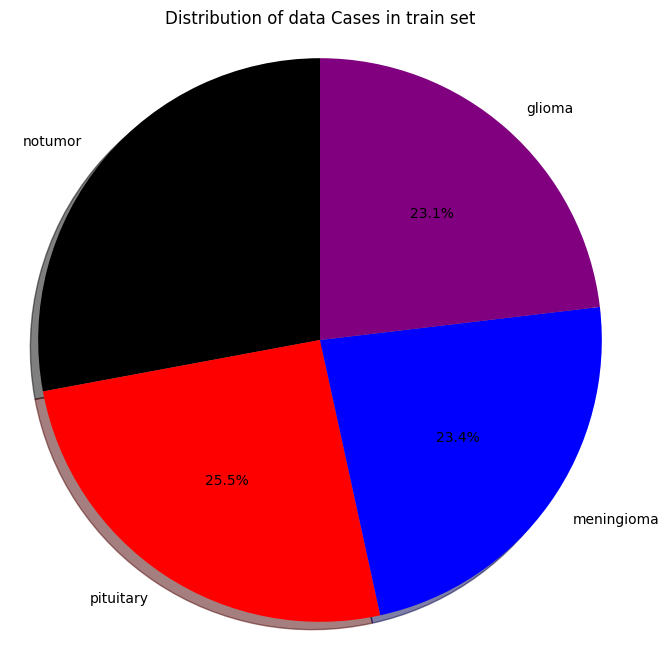

In [24]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(train_label_counts,
        labels=train_label_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['black', 'red','blue','purple'],  # Specify colors for each label
        shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Distribution of data Cases in train set')
plt.show()


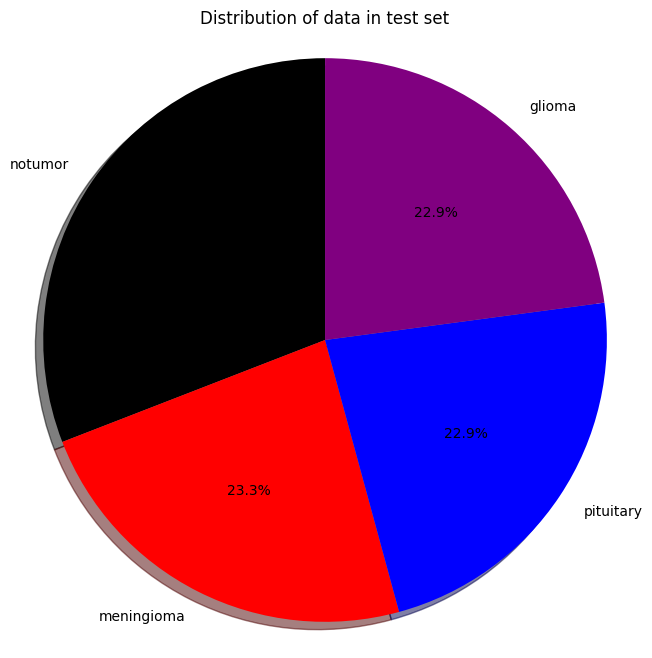

In [25]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(test_label_counts,
        labels=test_label_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['black', 'red','blue','purple'],  # Specify colors for each label
        shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Distribution of data in test set')
plt.show()


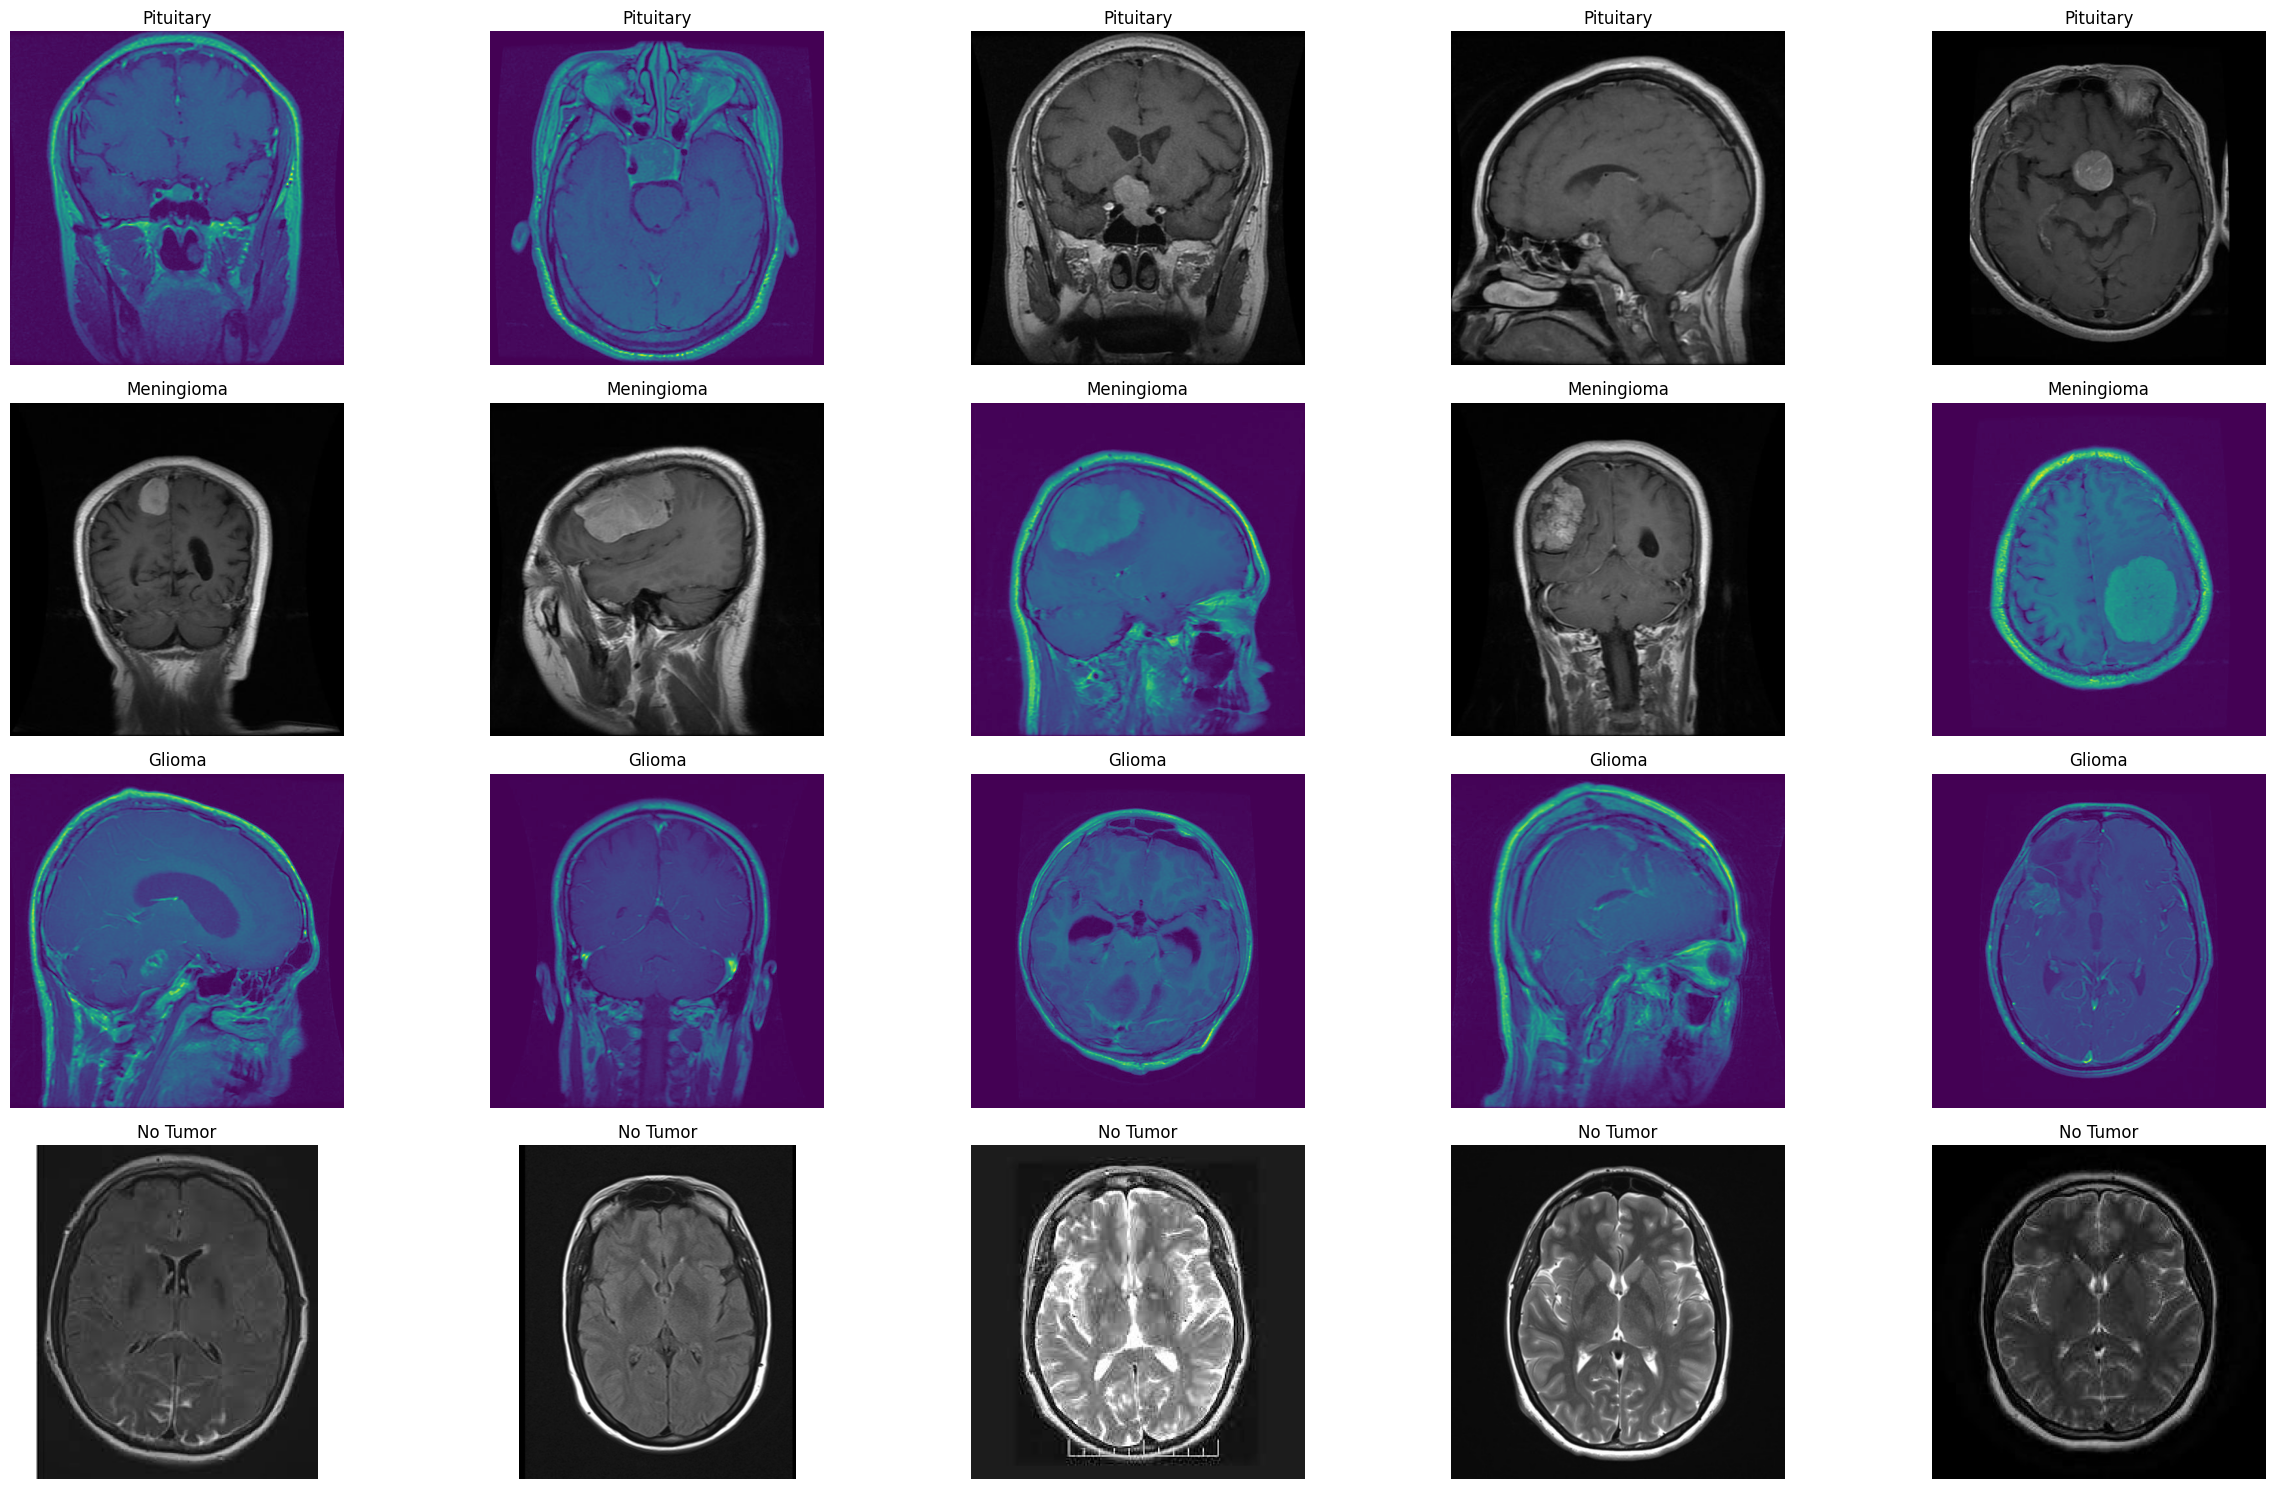

In [26]:



# Separate images by class
pituitary_images = train_df[train_df['label'] == 'pituitary']['file_path'].values
meningioma_images = train_df[train_df['label'] == 'meningioma']['file_path'].values
glioma_images = train_df[train_df['label'] == 'glioma']['file_path'].values
notumor_images = train_df[train_df['label'] == 'notumor']['file_path'].values

# Randomly sample 5 images from each category
pituitary_sample = np.random.choice(pituitary_images, min(5, len(pituitary_images)), replace=False)
meningioma_sample = np.random.choice(meningioma_images, min(5, len(meningioma_images)), replace=False)
glioma_sample = np.random.choice(glioma_images, min(5, len(glioma_images)), replace=False)
notumor_sample = np.random.choice(notumor_images, min(5, len(notumor_images)), replace=False)

# Create subplots
fig, axes = plt.subplots(4, 5, figsize=(25, 15))  # 4 rows and 5 columns

# Display pituitary images
for ax, img_path in zip(axes[0], pituitary_sample):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('Pituitary')

# Display meningioma images
for ax, img_path in zip(axes[1], meningioma_sample):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('Meningioma')

# Display glioma images
for ax, img_path in zip(axes[2], glioma_sample):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('Glioma')

# Display notumor images
for ax, img_path in zip(axes[3], notumor_sample):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('No Tumor')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [27]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(train_df[['file_path']],
train_df['label'])
train_df_resampled = pd.DataFrame(X_resampled, columns=['file_path'])
train_df_resampled['label'] = y_resampled
print("\nClass distribution after oversampling:")
print(train_df_resampled['label'].value_counts())


Class distribution after oversampling:
label
glioma        1595
meningioma    1595
notumor       1595
pituitary     1595
Name: count, dtype: int64


In [28]:
train_df_resampled.describe()

file_path   label
count                                                6380    6380
unique                                               5712       4
top     /content/drive/MyDrive/Datasets/brain tumor da...  glioma
freq                                                    4    1595

In [29]:
test_df.describe()

file_path    label
count                                                1311     1311
unique                                               1311        4
top     /content/drive/MyDrive/Datasets/brain tumor da...  notumor
freq                                                    1      405

In [30]:
train_df_resampled_label_counts = train_df_resampled['label'].value_counts()

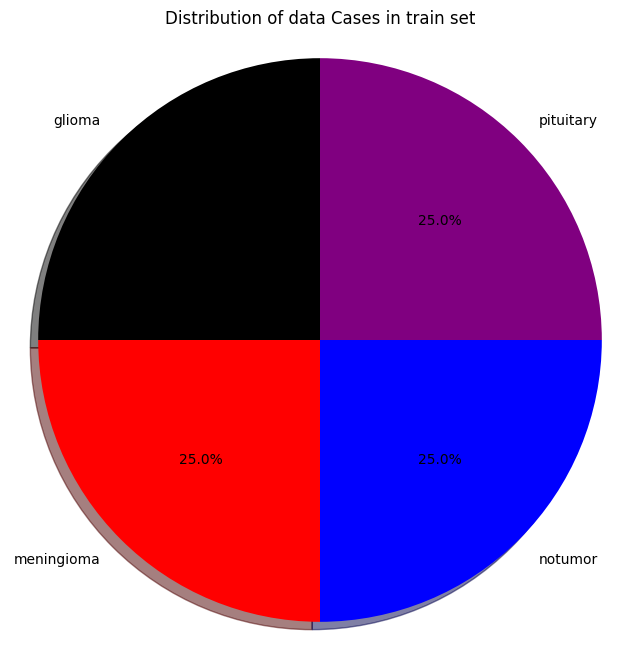

In [31]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(train_df_resampled_label_counts,
        labels=train_df_resampled_label_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['black', 'red','blue','purple'],  # Specify colors for each label
        shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Distribution of data Cases in train set')
plt.show()


#transformation and splitting

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
# Define transformations for the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip images horizontally
    transforms.RandomVerticalFlip(p=0.5),  # Randomly flip images vertically
    transforms.RandomRotation(degrees=30),  # Randomly rotate images
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Randomly change brightness, contrast, etc.
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        self.classes = dataframe['label'].unique()  # Store unique class names
        self.label_encoder = LabelEncoder()
        self.label_encoder.fit(self.classes)  # Fit the label encoder

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]  # Get image path
        label = self.dataframe.iloc[idx, 1]  # Get label

        # Check if the path is a file
        if not os.path.isfile(img_path):
            raise FileNotFoundError(f"Image file not found: {img_path}")

        img = Image.open(img_path).convert('RGB')  # Open image and convert to RGB

        if self.transform:
            img = self.transform(img)  # Apply transformations

        # Convert label to integer and then to tensor
        label = self.label_encoder.transform([label])[0]  # Transform the label to an integer
        label = torch.tensor(label, dtype=torch.long)  # Convert to tensor

        return img, label

# Create the dataset from the resampled training DataFrame
train_dataset = CustomDataset(train_df_resampled, transform=transform)

test_dataset = CustomDataset(test_df, transform=transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
]))  # Limited transformations for test set


# Get indices for splitting and labels for stratification
indices = list(range(len(train_df_resampled)))
train_labels = train_df_resampled['label'].values  # Extract labels for stratification

# Split into training and validation sets
train_indices, val_indices = train_test_split(indices, test_size=0.15, random_state=42, stratify=train_labels)

# Create training and validation subsets
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)  # Create validation subset from the original train dataset

# Create data loaders for each dataset
train_loader = DataLoader(train_subset, batch_size=128, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_subset, batch_size=128, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2, pin_memory=True)

# Optional: Print the sizes of the datasets
print(f"Training dataset size: {len(train_loader.dataset)}")
print(f"Validation dataset size: {len(val_loader.dataset)}")
print(f"Test dataset size: {len(test_loader.dataset)}")


Training dataset size: 5423
Validation dataset size: 957
Test dataset size: 1311


#Transform Dataset

tensor(1)


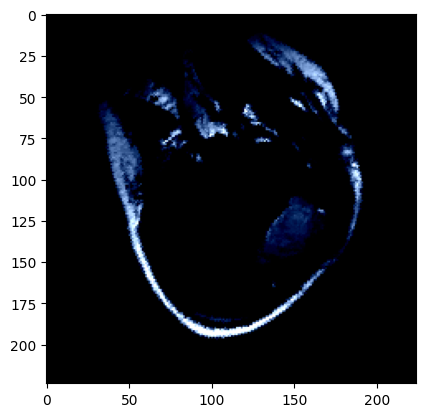

In [34]:
img, label = train_subset[300]
plt.imshow(img.permute(1,2,0)) #convert into bgr format
print(label)

tensor(1)


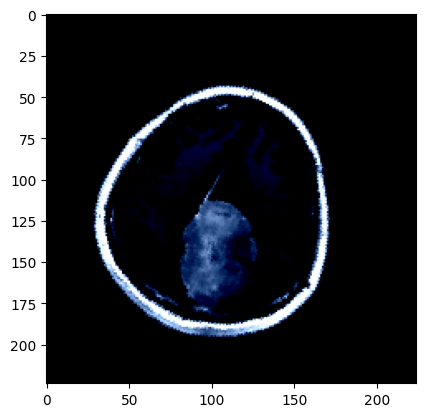

In [35]:
img, label = val_subset[0]
plt.imshow(img.permute(1,2,0)) #convert into bgr format
print(label)

In [36]:
print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

43
8
11


#Create Custom CNN Network with torch

In [37]:
class CNNmodel(nn.Module):
    def __init__(self):
        super(CNNmodel, self).__init__()

        # Convolutional layers with increased kernel size
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  # Batch normalization after conv1

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  # Batch normalization after conv2

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)  # Batch normalization after conv3

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)  # Batch normalization after conv4

        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(256)  # Batch normalization after conv5

        self.conv6 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(512)  # Batch normalization after conv5

        # Max pooling layers
        self.maxpool = nn.MaxPool2d(kernel_size=2)

        # Dropout layer
        self.dropout = nn.Dropout(p=0.5)

        # Activation Function
        self.leakyRelu = nn.LeakyReLU()

        # Fully connected layers
        self.fc1 = nn.Linear(512 * 3 * 3, 512)  # Adjusted input size based on the output of conv layers
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 4)

    def forward(self, x):
        # Convolutional layers with max pooling, batch normalization, and dropout
        x = self.leakyRelu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)

        x = self.leakyRelu(self.bn2(self.conv2(x)))
        x = self.maxpool(x)

        x = self.leakyRelu(self.bn3(self.conv3(x)))
        x = self.maxpool(x)

        x = self.leakyRelu(self.bn4(self.conv4(x)))
        x = self.maxpool(x)

        x = self.leakyRelu(self.bn5(self.conv5(x)))
        x = self.maxpool(x)

        x = self.leakyRelu(self.bn6(self.conv6(x)))
        x = self.maxpool(x)


        # Flatten
        out = x.view(x.size(0), -1)

        # Fully connected layers with dropout
        out = self.leakyRelu(self.fc1(out))
        out = self.dropout(out)  # Apply dropout
        out = self.leakyRelu(self.fc2(out))
        out = self.dropout(out)  # Apply dropout
        out = self.fc3(out)


        return out


In [38]:
Model = CNNmodel()

In [39]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available!")
    # Get the current device
    current_device = torch.cuda.current_device()
    print(f"Current CUDA device: {current_device}")

    # Get the number of GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    # Get the name of the GPU
    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")


CUDA is not available.


In [40]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
Model.to(device)

# Create a dummy input tensor on the same device
input_tensor = torch.randn(1, 3, 224, 224).to(device)

# Print model summary
summary(Model, (3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
       BatchNorm2d-2         [-1, 16, 224, 224]              32
         LeakyReLU-3         [-1, 16, 224, 224]               0
         MaxPool2d-4         [-1, 16, 112, 112]               0
            Conv2d-5         [-1, 32, 112, 112]           4,640
       BatchNorm2d-6         [-1, 32, 112, 112]              64
         LeakyReLU-7         [-1, 32, 112, 112]               0
         MaxPool2d-8           [-1, 32, 56, 56]               0
            Conv2d-9           [-1, 64, 56, 56]          18,496
      BatchNorm2d-10           [-1, 64, 56, 56]             128
        LeakyReLU-11           [-1, 64, 56, 56]               0
        MaxPool2d-12           [-1, 64, 28, 28]               0
           Conv2d-13          [-1, 128, 28, 28]          73,856
      BatchNorm2d-14          [-1, 128,

#Network visualize with torchviz and matplotlib image

In [41]:
# Create a dummy input
x = torch.randn(1, 3, 224, 224).to(device)  # Batch size of 1

# Get the output
y = Model(x)

# Visualize the model
dot = make_dot(y, params=dict(list(Model.named_parameters())))
dot.render("CNNbraintumor", format="png")  # Save as PNG


'CNNbraintumor.png'

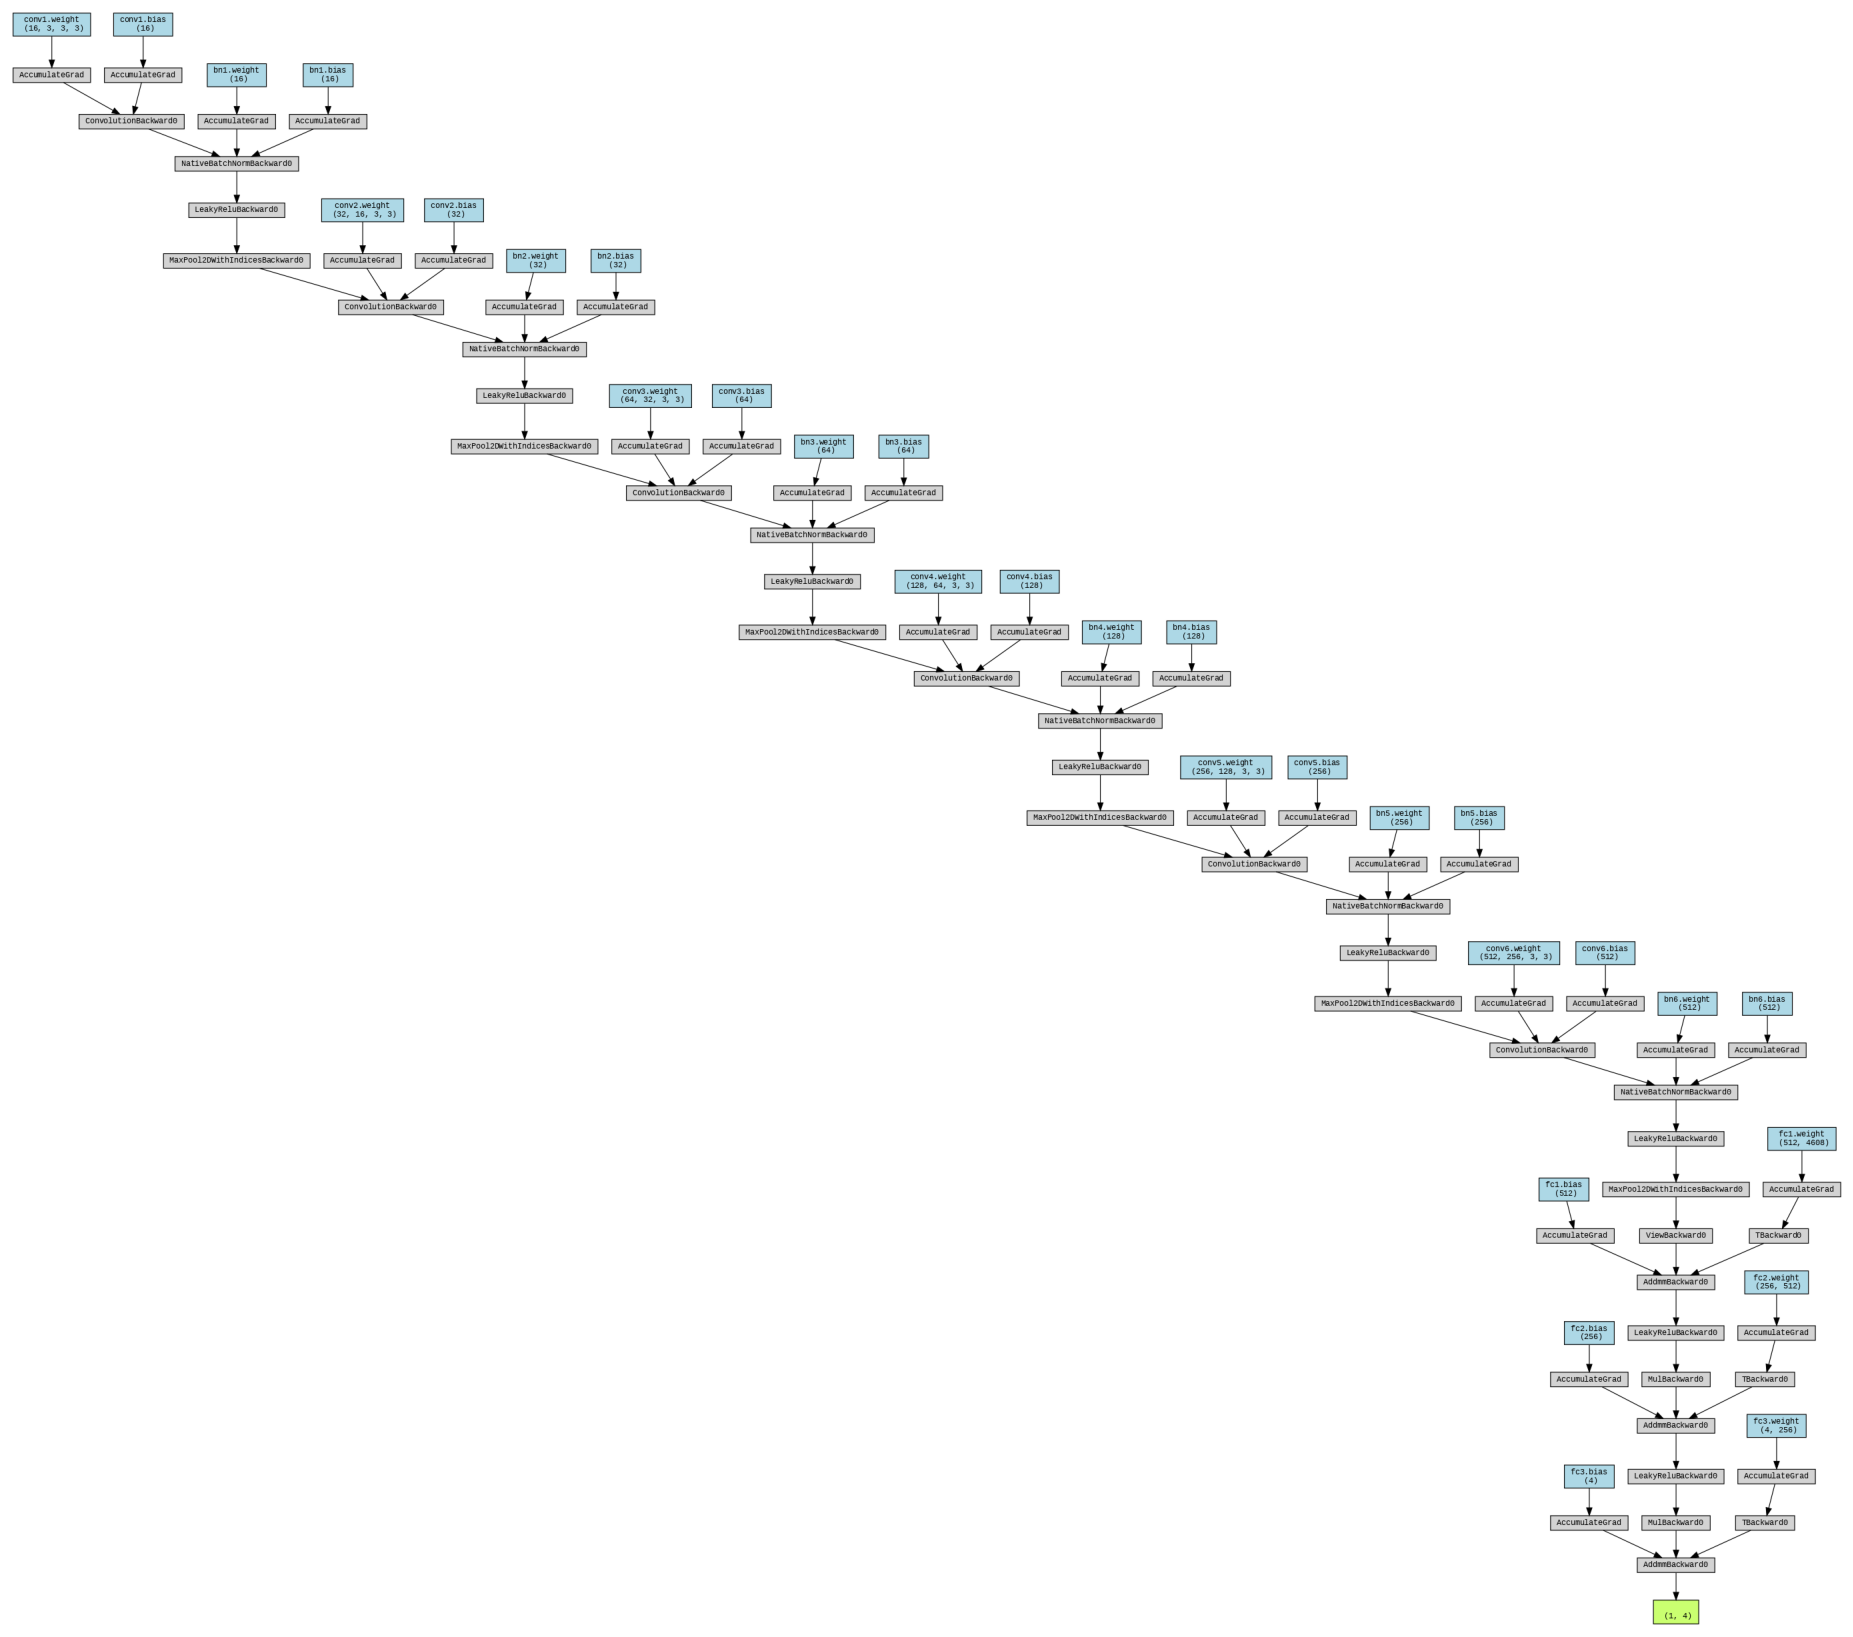

In [42]:
# Display the image using matplotlib
img = mpimg.imread("CNNbraintumor.png")
plt.figure(figsize=(35, 21))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

#Write Function for Training

###Select :

1.   Loss Function
2.   Optimizer
3.Activation Function



In [43]:
num_epoch = 20
loss_fn = nn.CrossEntropyLoss()
lr = 0.001
optimizer = torch.optim.Adam(Model.parameters(), lr=lr, weight_decay=1e-4)  # L2 regularization
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.4, patience=2, verbose=True)


#### What is L2 Regularization?

L2 regularization, also known as weight decay, is a technique used to prevent overfitting in machine learning models, particularly in neural networks. It works by adding a penalty to the loss function based on the magnitude of the model's weights. The idea is to discourage the model from fitting the training data too closely, which can lead to poor generalization on unseen data.

#### How it Works:
- **Loss Function Modification**: The original loss function \( L \) (like Mean Squared Error or Cross-Entropy) is modified to include a term that penalizes large weights:
  
  \[
  L_{\text{new}} = L + \lambda \sum_{i} w_i^2
  \]

  Here, \( \lambda \) is the regularization strength (also called the weight decay parameter), and \( w_i \) are the weights of the model.

- **Effect**: This additional term discourages the model from placing too much importance on any single feature by shrinking the weights towards zero. This helps to make the model more robust and improves generalization.

### What is Weight Decay?

In the context of optimizers in PyTorch (and many other frameworks), **weight decay** is the implementation of L2 regularization. When you set the `weight_decay` parameter in an optimizer, it automatically adds the L2 penalty to the loss function during training.

- **Argument in Optimizer**:
  - In the Adam optimizer, `weight_decay=1e-4` means that during each update of the weights, the optimizer will add a term proportional to the weights' squared values to the loss function.
  
### Why Use `weight_decay=1e-4`?

1. **Value Selection**:
   - The value \( 1e-4 \) (or \( 0.0001 \)) is a common starting point for the weight decay parameter. It’s often chosen based on empirical results from various tasks and datasets.
   - The optimal value can vary based on the specific dataset, model architecture, and training dynamics. You might need to experiment with different values (e.g., \( 1e-5, 1e-3 \)) to find the best one for your specific case.

2. **Balance**:
   - A value too small may not effectively prevent overfitting, while a value too large could lead to underfitting, where the model fails to learn the underlying patterns in the data.
   - Starting with \( 1e-4 \) allows for a reasonable balance between preventing overfitting and allowing the model to learn.

### Summary

- **L2 Regularization** is a method to prevent overfitting by penalizing large weights.
- **Weight Decay** is the implementation of L2 regularization in optimizers, adjusting the loss function to include a penalty for large weights.
- The choice of \( 1e-4 \) for weight decay is a common practice, and it may require tuning based on the model and dataset.

In [44]:
# Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=5, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0  # Reset counter if validation loss improves
        else:
            self.counter += 1  # Increment counter if no improvement
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose:
                    print("Early stopping triggered")

# Initialize early stopping
early_stopping = EarlyStopping(patience=5, verbose=True)


In [45]:
train_loss_list = []
val_loss_list = []
test_loss_list = []
acc_list = []

In [46]:
# Initialize variables to save the best model
best_val_loss = float('inf')  # Start with infinity
best_model_weights = None

# Training loop
for epoch in range(num_epoch):
    train_loss = 0
    val_loss = 0
    total = 0
    correct = 0

    # Training phase
    Model.train()  # Set model to training mode
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = Model(images)
        loss = loss_fn(outputs, labels)
        train_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Validation phase
    Model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = Model(images)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item()

            prediction = torch.max(outputs.data, 1)[1]
            total += len(labels)
            correct += (prediction == labels).sum().item()  # Ensure to convert to int

    # Step the scheduler based on validation loss
    scheduler.step(val_loss)

    # Calculate performance of training model
    accuracy = 100 * correct / float(total)
    train_loss_list.append(train_loss / len(train_loader))
    val_loss_list.append(val_loss / len(val_loader))  # Store validation loss
    acc_list.append(accuracy)

    print('-'*100)
    print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}, Accuracy: {:.2f}%'.format(
        epoch + 1, num_epoch, train_loss / len(train_loader), val_loss / len(val_loader), accuracy))

    # Check if the current validation loss is the best we've seen so far
    avg_val_loss = val_loss / len(val_loader)
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_wts = Model.state_dict()
        print("Best model weights saved.")


    # Check for early stopping
    early_stopping(avg_val_loss)
    if early_stopping.early_stop:
        print("Early stopping at epoch:", epoch + 1)
        break
# After training, save the best model weights to a file
torch.save(best_model_weights, 'best_model_weights.pth')
print("Best model weights saved.")


----------------------------------------------------------------------------------------------------
Epoch [1/20], Train Loss: 1.0604, Val Loss: 1.5030, Accuracy: 54.13%
Best model weights saved.
----------------------------------------------------------------------------------------------------
Epoch [2/20], Train Loss: 0.7289, Val Loss: 1.1811, Accuracy: 60.08%
Best model weights saved.
----------------------------------------------------------------------------------------------------
Epoch [3/20], Train Loss: 0.6515, Val Loss: 0.8293, Accuracy: 70.11%
Best model weights saved.
----------------------------------------------------------------------------------------------------
Epoch [4/20], Train Loss: 0.5007, Val Loss: 0.7262, Accuracy: 73.67%
Best model weights saved.
----------------------------------------------------------------------------------------------------
Epoch [5/20], Train Loss: 0.4756, Val Loss: 0.3506, Accuracy: 87.25%
Best model weights saved.
--------------------

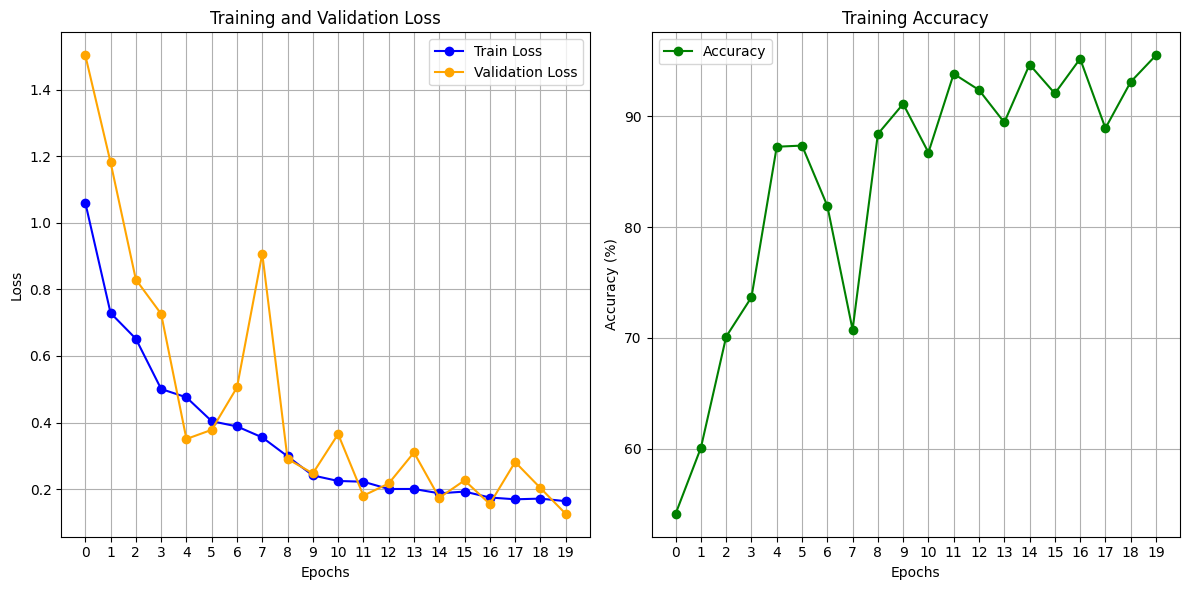

In [47]:
import matplotlib.pyplot as plt

# Plotting training and validation loss
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(range(num_epoch), train_loss_list, label='Train Loss', color='blue', marker='o')
plt.plot(range(num_epoch), val_loss_list, label='Validation Loss', color='orange', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(num_epoch))  # Ensure all epochs are labeled
plt.grid(True)
plt.legend()
plt.tight_layout()

# Accuracy Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(range(num_epoch), acc_list, label='Accuracy', color='green', marker='o')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xticks(range(num_epoch))  # Ensure all epochs are labeled
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plots
plt.show()


#Test and evaluation

In [49]:


# Assuming you have lists to store test losses and accuracies
test_loss_list = []  # Store test losses over epochs
test_accuracy_list = []  # Store test accuracies over epochs

# Test phase
Model.eval()  # Set model to evaluation mode
test_loss = 0
total = 0
correct = 0
all_test_labels = []
all_test_predictions = []

with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = Model(images)
        loss = loss_fn(outputs, labels)
        test_loss += loss.item()

        prediction = torch.max(outputs.data, 1)[1]
        total += len(labels)
        correct += (prediction == labels).sum().item()  # Count correct predictions

        # Store labels and predictions for metrics
        all_test_labels.extend(labels.cpu().numpy())
        all_test_predictions.extend(prediction.cpu().numpy())

# Calculate test accuracy
test_accuracy = 100 * correct / float(total)
test_loss_avg = test_loss / len(test_loader)
test_loss_list.append(test_loss / len(test_loader))
test_accuracy_list.append(test_accuracy)

# Print test results
print('Test Loss: {:.4f}, Test Accuracy: {:.2f}%'.format(
    test_loss / len(test_loader), test_accuracy))



Test Loss: 0.1453, Test Accuracy: 94.97%


#Visualize model performance on test set

In [1]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
)

# Assuming all_test_labels and all_test_predictions are already populated

# Convert to numpy arrays
y_true = np.array(all_test_labels)
y_pred = np.array(all_test_predictions)

# Generate classification report
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)

# Visualize Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
class_names = train_df_resampled['label'].unique()  # Get unique class names

plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = conf_matrix.max() / 2.  # Set threshold for text color
for i, j in np.ndindex(conf_matrix.shape):
    plt.text(j, i, f'{conf_matrix[i, j]}',
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()


NameError: name 'np' is not defined

In [69]:
def store_model_performance(results_df, model_name, test_loss, test_accuracy, precision, recall, f1_score):
    """
    Store the performance metrics of a model in the results DataFrame.

    Parameters:
    - results_df: DataFrame to store results.
    - model_name: Name of the model.
    - test_loss: Loss of the model on the test set.
    - test_accuracy: Accuracy of the model on the test set.
    - precision: Precision of the model.
    - recall: Recall of the model.
    - f1_score: F1 Score of the model.

    Returns:
    - Updated results DataFrame.
    """
    # Create a new DataFrame for the current results
    current_results = pd.DataFrame([{
        'Model_Name': model_name,
        'Test_Loss': test_loss,
        'Test_Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1_score
    }])

    # Concatenate the new results with the existing DataFrame
    results_df = pd.concat([results_df, current_results], ignore_index=True)

    return results_df



        Model_Name  Test_Loss  Test_Accuracy  Precision  Recall  F1_Score
0  Your_Model_Name       0.25           85.0        0.8    0.75      0.77


In [ ]:
# Extract metrics from the report
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

# Store performance metrics for the model
model_name = "CNN"  # Replace with actual model name
results_df = store_model_performance(
    results_df,
    model_name=model_name,
    test_loss=test_loss_avg,
    test_accuracy=test_accuracy,
    precision=precision,
    recall=recall,
    f1_score=f1_score
)

#making prediction from Model and visualize from each class

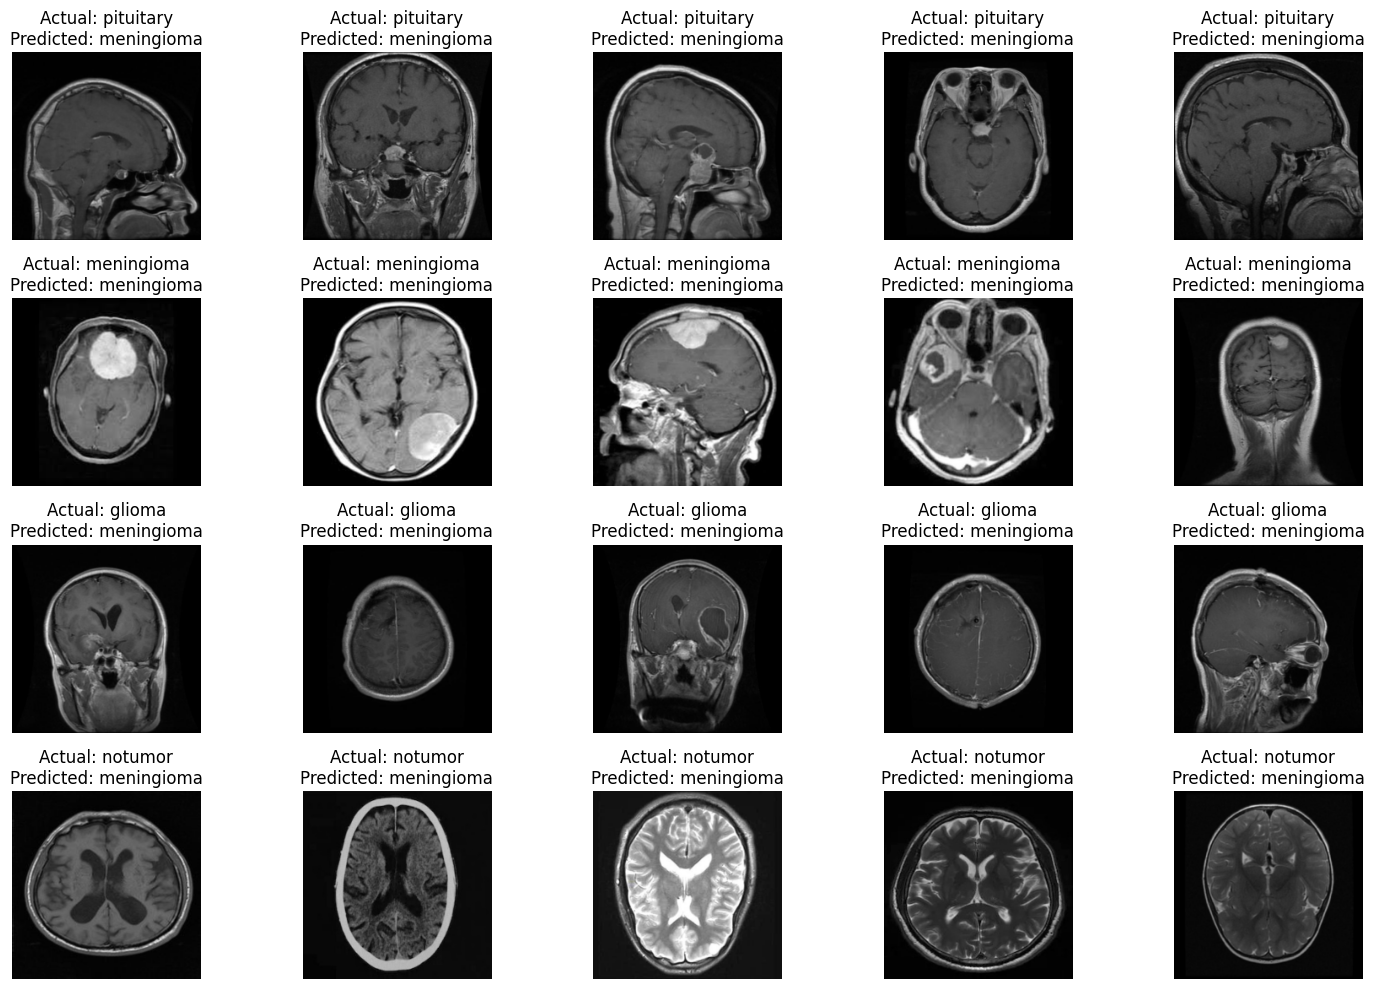

In [ ]:
import random
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from PIL import Image

# Define any transformations you want to apply to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size of your model
    transforms.ToTensor(),           # Convert to tensor
])

def visualize_predictions(model, test_df, num_samples=5):
    # Set model to evaluation mode
    model.eval()

    # Get class names (assuming 'label' is the column for labels in your DataFrame)
    class_names = test_df['label'].unique()

    # Create a figure to hold the plots
    plt.figure(figsize=(15, 10))

    # Loop through each class
    for class_idx in range(len(class_names)):
        # Get all indices of the current class
        class_indices = test_df[test_df['label'] == class_names[class_idx]].index.tolist()

        # Randomly select num_samples indices from the class indices
        selected_indices = random.sample(class_indices, min(num_samples, len(class_indices)))  # Handle case where class has fewer samples

        # Loop through the selected indices and plot the images
        for i, idx in enumerate(selected_indices):
            # Assuming your DataFrame has an 'image' column that stores the image file paths
            img_path = test_df.loc[idx, 'file_path']  # Adjust if the column name is different
            label = test_df.loc[idx, 'label']

            # Load the image and apply transformations
            img = Image.open(img_path).convert("RGB")  # Open the image
            img = transform(img).unsqueeze(0).to(device)  # Apply transformations and add batch dimension

            # Make prediction
            with torch.no_grad():
                output = model(img)
                _, pred = torch.max(output, 1)

            # Plot the image
            plt.subplot(len(class_names), num_samples, class_idx * num_samples + i + 1)
            plt.imshow(img.cpu().squeeze(0).permute(1, 2, 0))  # Convert to HWC format
            plt.title(f'Actual: {class_names[class_idx]}\nPredicted: {class_names[pred.item()]}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to visualize predictions
visualize_predictions(Model, test_df)


#Transfer Learning And Pretrained Model

For brain tumor classification using transfer learning, leveraging pre-trained models can significantly enhance performance due to their ability to extract relevant features from images. Here are five of the best architectures commonly used for medical image classification, along with some insights on their effectiveness:

### 1. **ResNet (Residual Networks)**
- **Description**: ResNet introduces skip connections that allow gradients to flow through the network without vanishing. This architecture is particularly effective for very deep networks.
- **Benefits**: It has shown excellent performance in various image classification tasks, including medical images, due to its ability to learn complex features.
- **Transfer Learning**: You can use pre-trained weights on ImageNet and fine-tune them on your specific dataset.

### 2. **DenseNet (Densely Connected Convolutional Networks)**
- **Description**: DenseNet connects each layer to every other layer in a feed-forward fashion. This means that the feature maps from all previous layers are used as inputs to the subsequent layers.
- **Benefits**: It reduces the number of parameters and improves gradient flow, making it suitable for medical images where data may be limited.
- **Transfer Learning**: Like ResNet, you can utilize pre-trained weights and adapt the model to your dataset.

### 3. **EfficientNet**
- **Description**: EfficientNet scales the model size (depth, width, resolution) in a balanced way. It achieves state-of-the-art accuracy with fewer parameters compared to other architectures.
- **Benefits**: EfficientNet models are efficient in terms of computation and memory, making them ideal for deployment in resource-constrained environments.
- **Transfer Learning**: Pre-trained versions are available, which can be fine-tuned on medical datasets.

### 4. **VGG (Visual Geometry Group)**
- **Description**: VGG is known for its simplicity and depth. It uses small convolutional filters (3x3) stacked on top of each other.
- **Benefits**: While it has a large number of parameters, it is effective in capturing spatial hierarchies in images.
- **Transfer Learning**: VGG models pre-trained on ImageNet can be fine-tuned for specific tasks like brain tumor classification.

### 5. **Inception (GoogLeNet)**
- **Description**: Inception uses multiple filter sizes in parallel (1x1, 3x3, 5x5) to capture different features at various scales.
- **Benefits**: This architecture is efficient in terms of computation and has shown strong performance in image classification tasks.
- **Transfer Learning**: The pre-trained models can be adapted to new datasets, making them suitable for medical image classification.

### Recommendations for Implementation
- **Data Augmentation**: Since medical datasets can be limited, applying data augmentation techniques (rotation, flipping, scaling, etc.) can help improve model generalization.
- **Fine-tuning**: Start by freezing the initial layers of the pre-trained model and only train the last few layers. Gradually unfreeze layers for fine-tuning as needed.
- **Evaluation Metrics**: Use appropriate metrics such as accuracy, precision, recall, and F1-score to evaluate model performance, especially in imbalanced datasets.

### Conclusion
Consider experimenting with these architectures and see which one performs best on your specific dataset. EfficientNet and DenseNet are particularly recommended for their balance of performance and efficiency, especially in medical image classification tasks.

In [ ]:
# Define the number of classes
num_classes = 4

# Define the models
models_dict = {
    'resnet': models.resnet50(pretrained=True),# 25 million parameters
    'densenet': models.densenet121(pretrained=True),#8 million parameters
    'vgg': models.vgg16(pretrained=True), #138 million parameters
    'inception': models.inception_v3(pretrained=True, aux_logits=True),  # 24 million parameters . Set aux_logits to True
    'efficientnet': models.efficientnet_b0(pretrained=True) #5 million parameters
}

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 118MB/s]
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:01<00:00, 19.1MB/s]
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 230MB/s]
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:05<00:00, 20.6MB/s] 
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 142MB/s] 


In [ ]:
def Modify_final_layer(model, num_classes):
    if isinstance(model, models.ResNet):
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif isinstance(model, models.DenseNet):
        model.classifier = nn.Linear(model.classifier.in_features, num_classes)
    elif isinstance(model, models.VGG):
        # Access the last layer in the classifier
        last_layer = model.classifier[-1]
        if isinstance(last_layer, nn.Linear):
            model.classifier[-1] = nn.Linear(last_layer.in_features, num_classes)
        else:
            raise Exception("Final layer is not a Linear layer in VGG!")
    elif isinstance(model, models.Inception3):
        model.AuxLogits.fc = nn.Linear(model.AuxLogits.fc.in_features, num_classes)  # Modify auxiliary classifier
        model.fc = nn.Linear(model.fc.in_features, num_classes)  # Modify main classifier
    elif isinstance(model, models.EfficientNet):
        # EfficientNet's classifier is a Sequential; access the last layer
        if isinstance(model.classifier, nn.Sequential):
            last_layer = model.classifier[-1]
            if isinstance(last_layer, nn.Linear):
                model.classifier[-1] = nn.Linear(last_layer.in_features, num_classes)
            else:
                raise Exception("Final layer is not a Linear layer in EfficientNet!")
        else:
            raise Exception("Classifier is not a Sequential in EfficientNet!")
    else:
        raise Exception(f"Couldn't find final classification layer for {type(model).__name__}!")


In [ ]:
for name, model in models_dict.items():
    print(f"Model: {name}")
    print(model)  # Print the model structure
    Modify_final_layer(model, num_classes)


Model: resnet
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1

In [ ]:
# Create a directory to save the images
output_dir = 'model_visualizations'
os.makedirs(output_dir, exist_ok=True)

# Function to visualize a model
def visualize_model(model, model_name):
    # Create a dummy input tensor with the appropriate shape
    dummy_input = torch.randn(1, 3, 224, 224)  # Batch size of 1, 3 channels, 224x224 image
    # Generate the graph
    dot = make_dot(model(dummy_input), params=dict(list(model.named_parameters())))
    # Save the graph as a PNG file
    dot.render(os.path.join(output_dir, model_name), format='png', cleanup=True)

# Visualize each model and save the images
for name, model in models_dict.items():
    visualize_model(model, name)

# Plot the saved images using matplotlib
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

# Load and display each image
for i, model_name in enumerate(models_dict.keys()):
    img_path = os.path.join(output_dir, f"{model_name}.png")
    img = plt.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')  # Hide axes
    axs[i].set_title(model_name)

plt.tight_layout()
plt.show()


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.926433 to fit


RuntimeError: Calculated padded input size per channel: (3 x 3). Kernel size: (5 x 5). Kernel size can't be greater than actual input size

In [ ]:
# Training function
def train_model(model, train_loader, val_loader, num_epochs=5):
    model = model.to(device)  # Move model to device (GPU or CPU)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to device
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calculate average loss for the epoch
        avg_loss = running_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

        # Validation step
        model.eval()  # Set the model to evaluation mode
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():  # Disable gradient calculation
            for val_images, val_labels in val_loader:
                val_images, val_labels = val_images.to(device), val_labels.to(device)
                val_outputs = model(val_images)
                loss = criterion(val_outputs, val_labels)
                val_loss += loss.item()

                # Calculate accuracy
                _, predicted = torch.max(val_outputs.data, 1)
                total += val_labels.size(0)
                correct += (predicted == val_labels).sum().item()

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = 100 * correct / total
        print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.2f}%")

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Train each model
for name, model in models_dict.items():
    print(f"Training {name} model...")
    train_model(model, train_loader, val_loader)


Training resnet model...
Epoch [1/5], Loss: 0.4144
Validation Loss: 1.3532, Accuracy: 74.71%
Epoch [2/5], Loss: 0.2285
Validation Loss: 0.5977, Accuracy: 83.91%
Epoch [3/5], Loss: 0.1789
Validation Loss: 0.3421, Accuracy: 87.36%
Epoch [4/5], Loss: 0.1640
Validation Loss: 0.5787, Accuracy: 81.82%
Epoch [5/5], Loss: 0.1533
Validation Loss: 0.4895, Accuracy: 85.37%
Training densenet model...
Epoch [1/5], Loss: 0.3044
Validation Loss: 0.3040, Accuracy: 91.64%


##explanation of training loop:
Training Loop:

The model is set to training mode with model.train().
For each batch in the training dataset, the images and labels are moved to the appropriate device.
The optimizer gradients are zeroed, and the forward pass is computed.
The loss is calculated, backpropagated, and the optimizer updates the model weights.
The running loss is accumulated to compute the average loss for the epoch.
Validation Step:

After completing the training for an epoch, the model is set to evaluation mode with model.eval().
The validation loop uses torch.no_grad() to disable gradient calculations, which saves memory and improves performance.
The validation loss is accumulated, and accuracy is calculated by comparing predicted labels to the true labels.
Average validation loss and accuracy are printed.
Important Notes
Ensure that train_loader and val_loader are properly defined and provide batches of data.
You can adjust the learning rate and other hyperparameters as needed.
This code assumes that the datasets are set up correctly and that the models are compatible with the input data shapes.